# Airline Passenger Satisfaction

## Table of Contents

- Data Features
- Importing Libraries
- Reading the Data
- Statistical Information and General Information about the Data
- Data Cleaning
- EDA
- Data Preprocessing
- Model Building
- Model Evaluation

## Data Features

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Importing Libraries

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

import warnings
warnings.filterwarnings('ignore')

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading the Data

In [213]:
train = pd.read_csv('airline passenger satisfaction train.csv')
test = pd.read_csv('airline passenger satisfaction test.csv')

## Statistical Information and General Information about the Data

## train

In [214]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [215]:
test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [218]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [219]:
test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [220]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [221]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [222]:
train.shape

(103904, 25)

In [223]:
test.shape

(25976, 25)

## Data Cleaning

In [224]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [225]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [226]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103899    False
103900    False
103901    False
103902    False
103903    False
Length: 103904, dtype: bool

In [227]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Length: 25976, dtype: bool

### Delete unnecessary column

In [228]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [229]:
test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### fill the missing value

In [230]:
train.fillna(train['Arrival Delay in Minutes'].mean(), inplace=True)

In [231]:
test.fillna(test['Arrival Delay in Minutes'].mean(), inplace=True)

In [232]:
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [233]:
test.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Exploratory Data Analyst

In [234]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Satisfaction by Gender

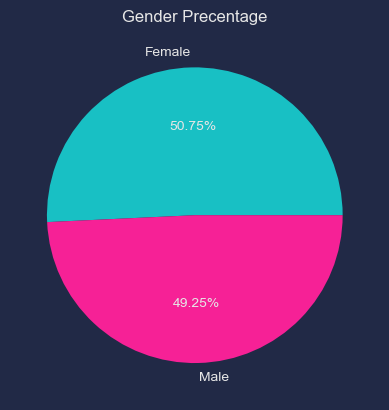

In [235]:
train.groupby('Gender').size().plot.pie(autopct='%1.2f%%')
plt.title("Gender Precentage")
plt.show()

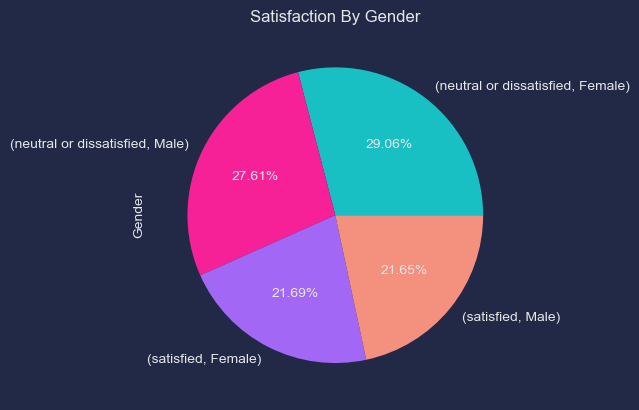

In [236]:
train.groupby('satisfaction')['Gender'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.title('Satisfaction By Gender')
plt.show()

Bisa kita lihat, kepuasan berdasarkan jenis kelamin antara laki-laki dan perempuan. dari hasil diatas menenunjukkan bahwa, berdasarkan jenis kelamin, tingkat kepuasan atau satisfied jauh lebih kecil daripada tingkat ketidakpuasan.

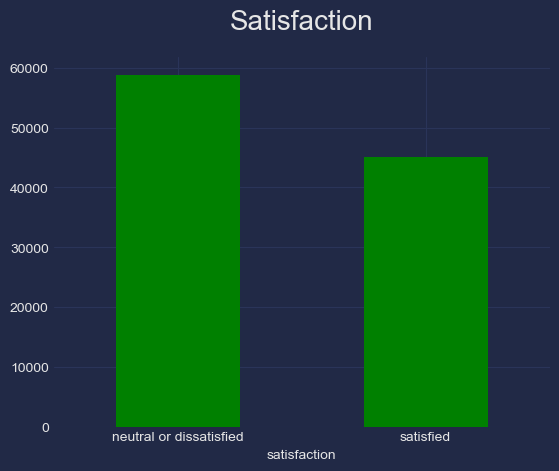

In [237]:
train.groupby('satisfaction').size().plot(kind="bar", color = "green")
plt.title('Satisfaction', fontsize = 20, pad = 20)
plt.xticks(rotation = 0)
plt.show()

Tingkat ketidakpuasan jauh lebih banyak daripada tingkat kepuasan

In [238]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Mencari Arrival dan departure delay in minutes tertinggi dan terendah

In [239]:
print("Arrival Delay in Minutes Tertinggi: ", train['Arrival Delay in Minutes'].max(), "Minutes")
print("Departure Delay in Minutes Tertinggi: ", train['Departure Delay in Minutes'].max(), "Minutes")

# Convert to Hours
convert_arrival = train['Arrival Delay in Minutes'].max()
convert_arrival = round(convert_arrival/60)
print(f"Arrival Convert to Hours: {convert_arrival} Hours")

convert_dpt = train['Departure Delay in Minutes'].max()
convert_dpt = round(convert_dpt/60)
print(f"Departure Convert to Hours: {convert_dpt} Hours")

Arrival Delay in Minutes Tertinggi:  1584.0 Minutes
Departure Delay in Minutes Tertinggi:  1592 Minutes
Arrival Convert to Hours: 26 Hours
Departure Convert to Hours: 27 Hours


### Customer type

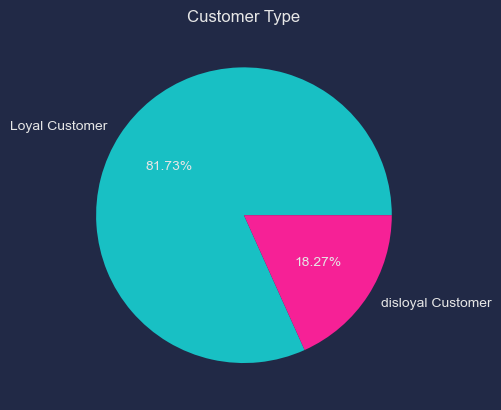

In [240]:
train.groupby('Customer Type').size().plot.pie(autopct='%1.2f%%')
plt.title("Customer Type")
plt.show()

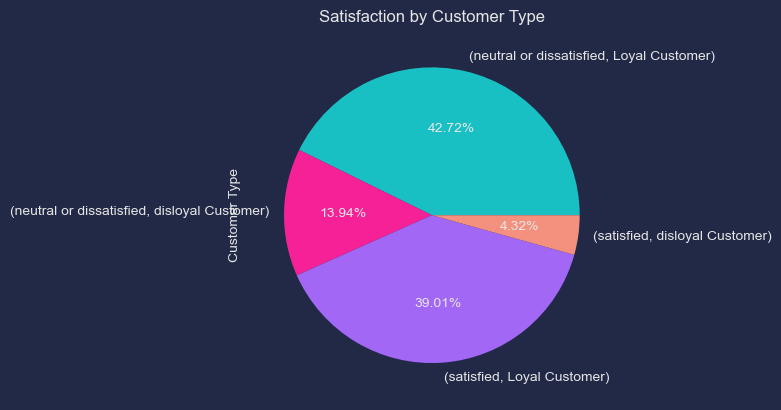

In [241]:
train.groupby('satisfaction')['Customer Type'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Satisfaction by Customer Type")
plt.show()

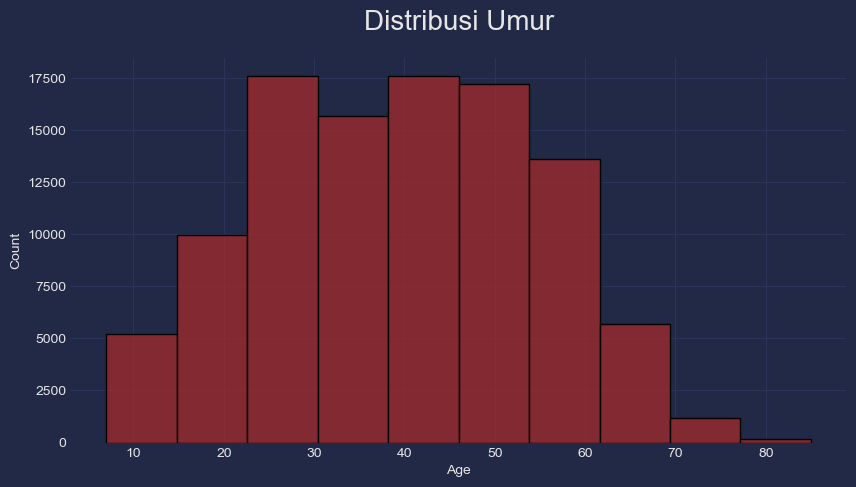

In [242]:
plt.figure(figsize = (10,5))
sns.histplot(train['Age'], bins = 10, color="brown")
plt.title("Distribusi Umur", fontsize = 20, pad = 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

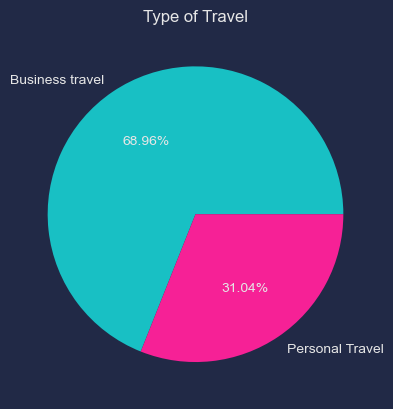

In [243]:
train.groupby('Type of Travel').size().plot.pie(autopct="%1.2f%%")
plt.title("Type of Travel")
plt.show()

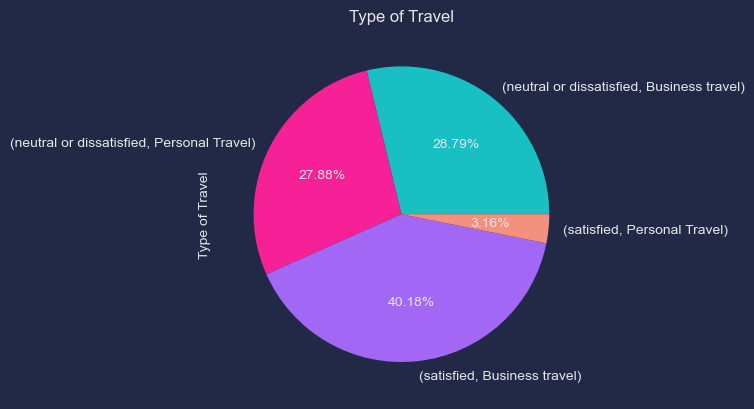

In [244]:
train.groupby('satisfaction')['Type of Travel'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Type of Travel")
plt.show()

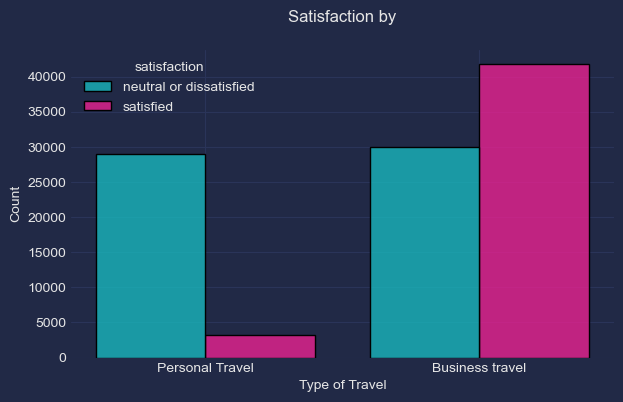

In [245]:
plt.figure(figsize = (7,4))
sns.histplot(data = train, x = 'Type of Travel', hue ='satisfaction', multiple = "dodge", shrink=.8)
plt.title(f"Satisfaction by", pad = 20)
plt.show()

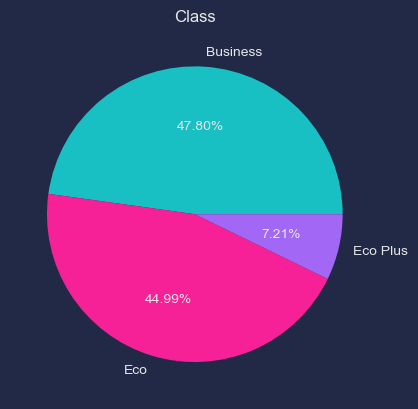

In [246]:
train.groupby('Class').size().plot.pie(autopct="%1.2f%%")
plt.title("Class")
plt.show()

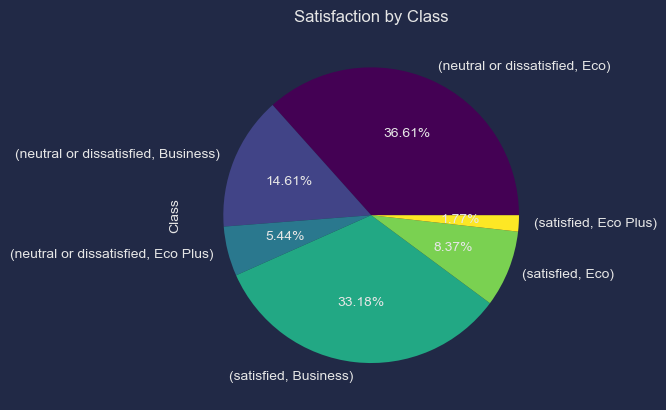

In [247]:
train.groupby('satisfaction')['Class'].value_counts().plot.pie(autopct="%1.2f%%", cmap = "viridis")
plt.title("Satisfaction by Class")
plt.show()

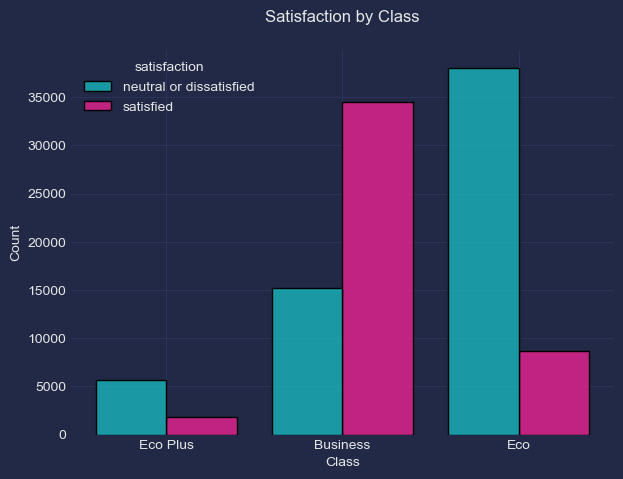

In [248]:
plt.figure(figsize = (7,5))
sns.histplot(data = train, x = 'Class', hue = 'satisfaction', multiple = "dodge", shrink=.8)
plt.title("Satisfaction by Class", pad = 20)
plt.show()

Tingkat kepuasan tertinggi pada Airline diperoleh oleh class = Business Class, namun bukan berarti jika memiliki tingkat kepuasan paling tinggi mendapat tingkat ketidakpuasan paling rendah. tingkat ketidakpuasan business class bukan menjadi yang paling rendah, diantara 3 Class, Eco plus Class yang memiliki ketidakpuasan paling rendah diantara Class yang lain.

In [249]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [250]:
columns_int = train.iloc[:, 6:20]
columns_int
stfct = train['satisfaction']

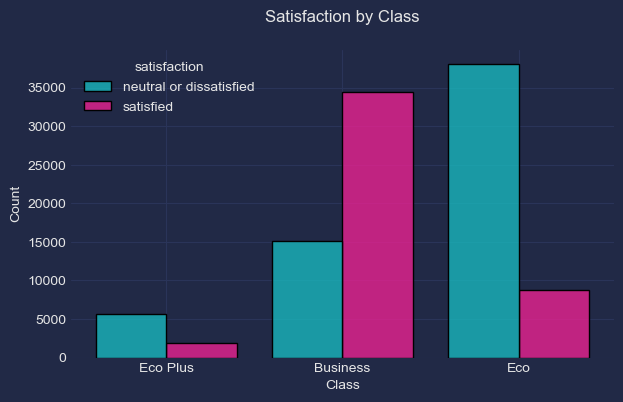

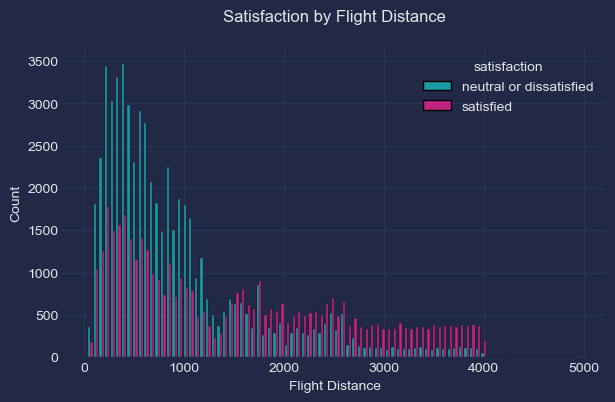

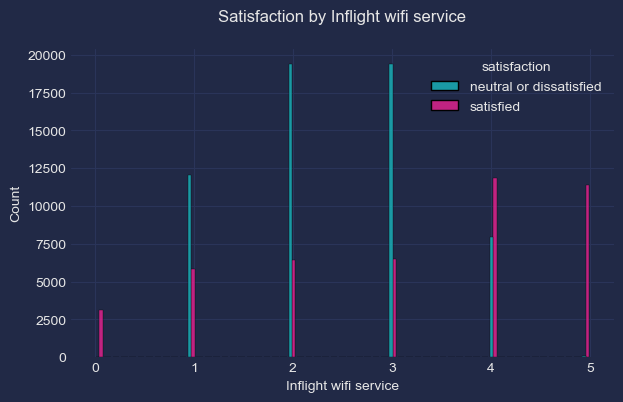

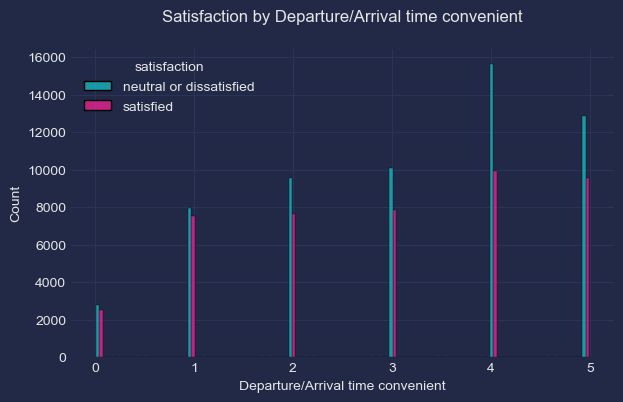

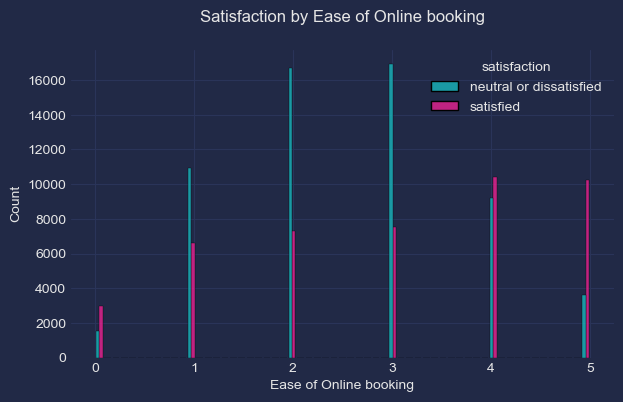

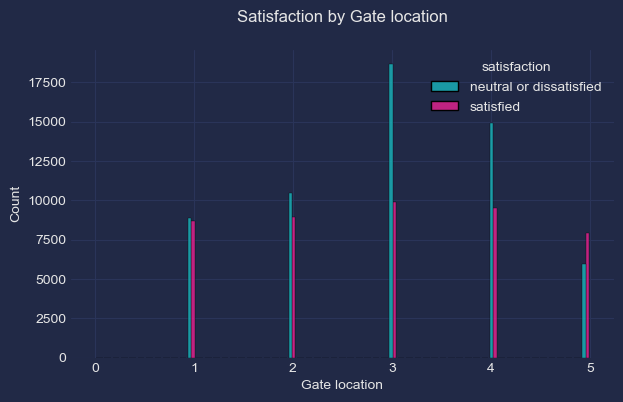

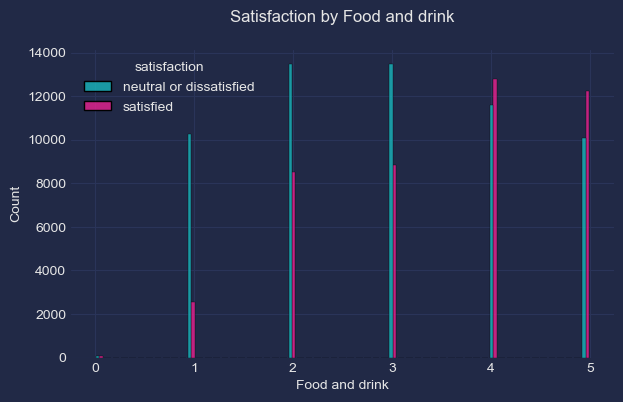

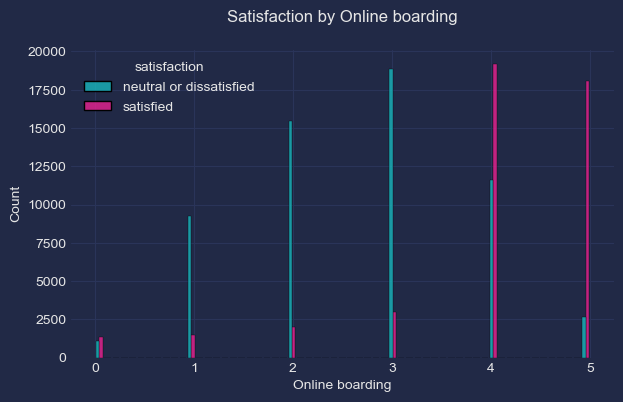

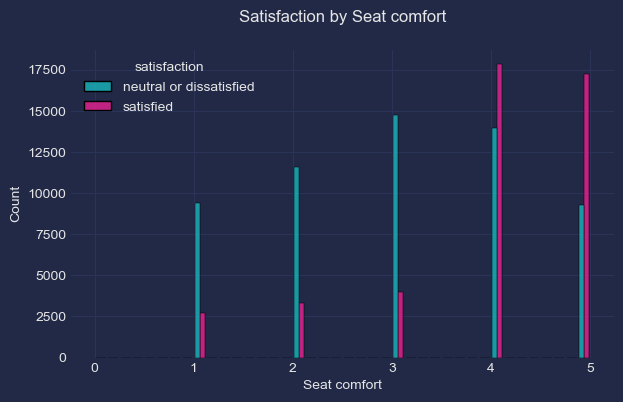

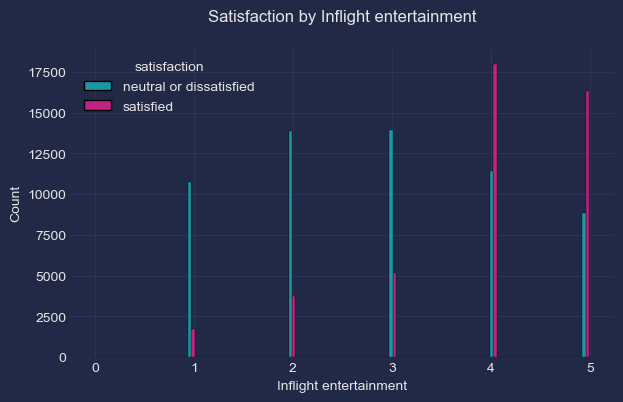

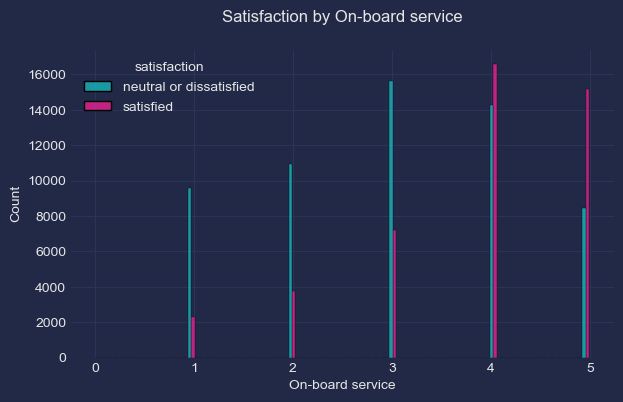

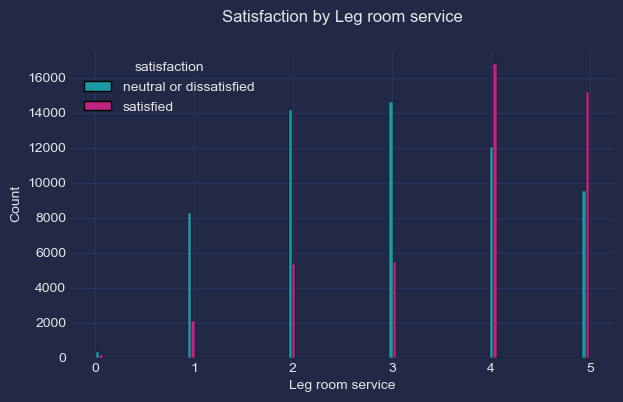

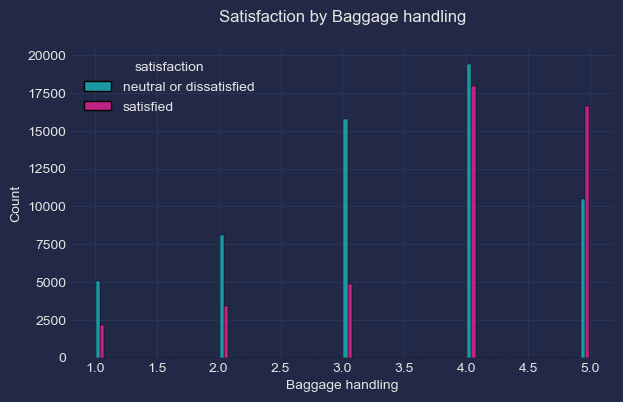

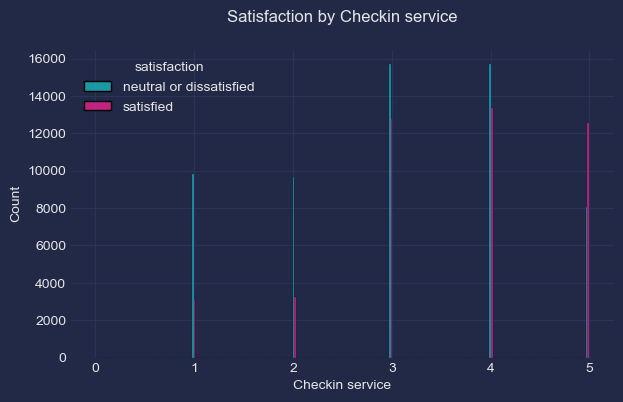

In [251]:
for col in columns_int:
    plt.figure(figsize = (7,4))
    sns.histplot(data = columns_int, x = col, hue = stfct, multiple = "dodge", shrink=.8)
    plt.title(f"Satisfaction by {col}", pad = 20)
    plt.show()

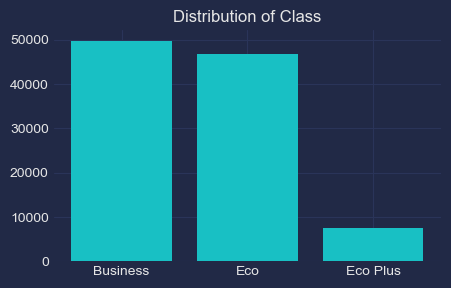

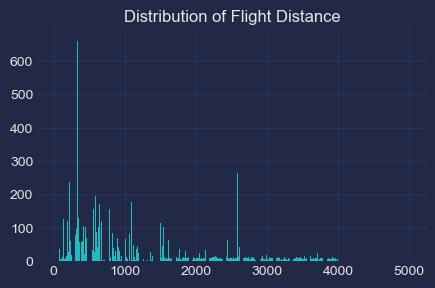

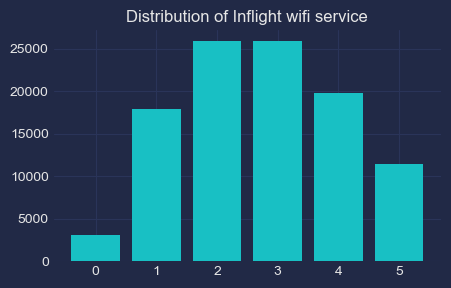

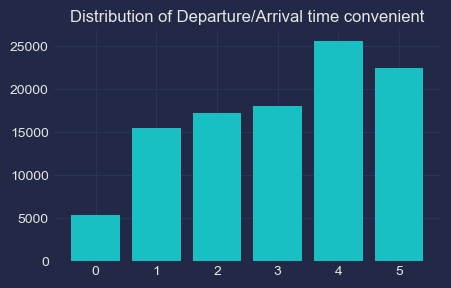

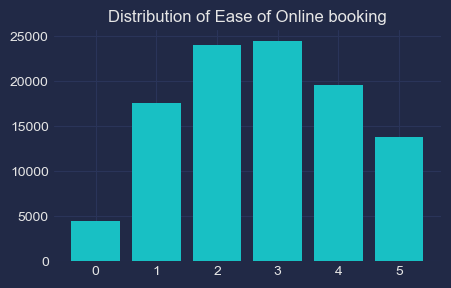

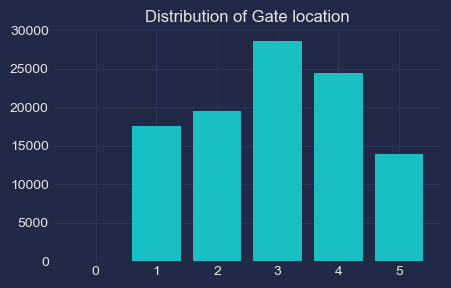

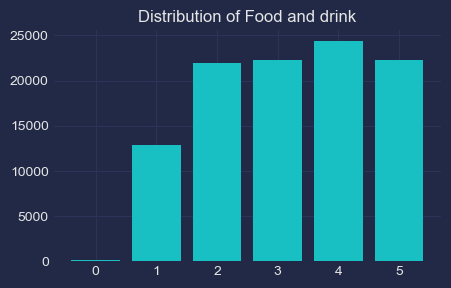

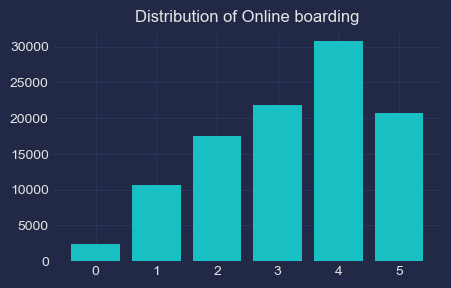

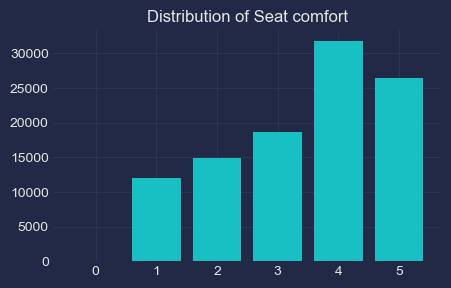

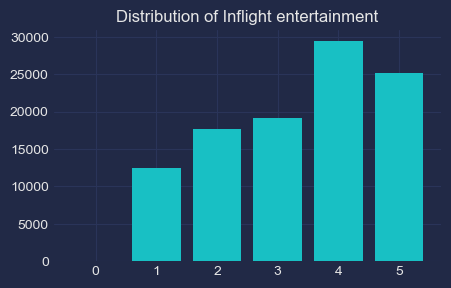

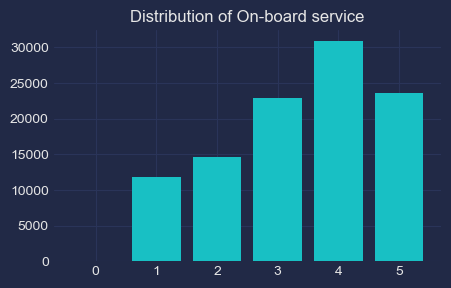

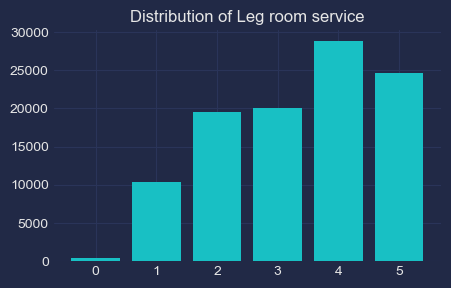

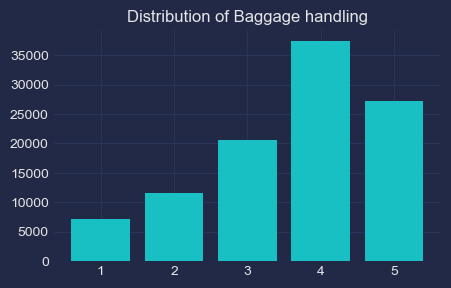

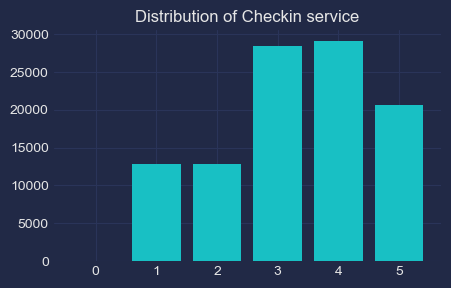

In [252]:
for col in columns_int:
    plt.figure(figsize = (5,3))
    valuecounts = columns_int[col].value_counts()
    plt.bar(x = valuecounts.index,
           height = valuecounts.values)
    plt.title(f"Distribution of {col}")
    plt.show()

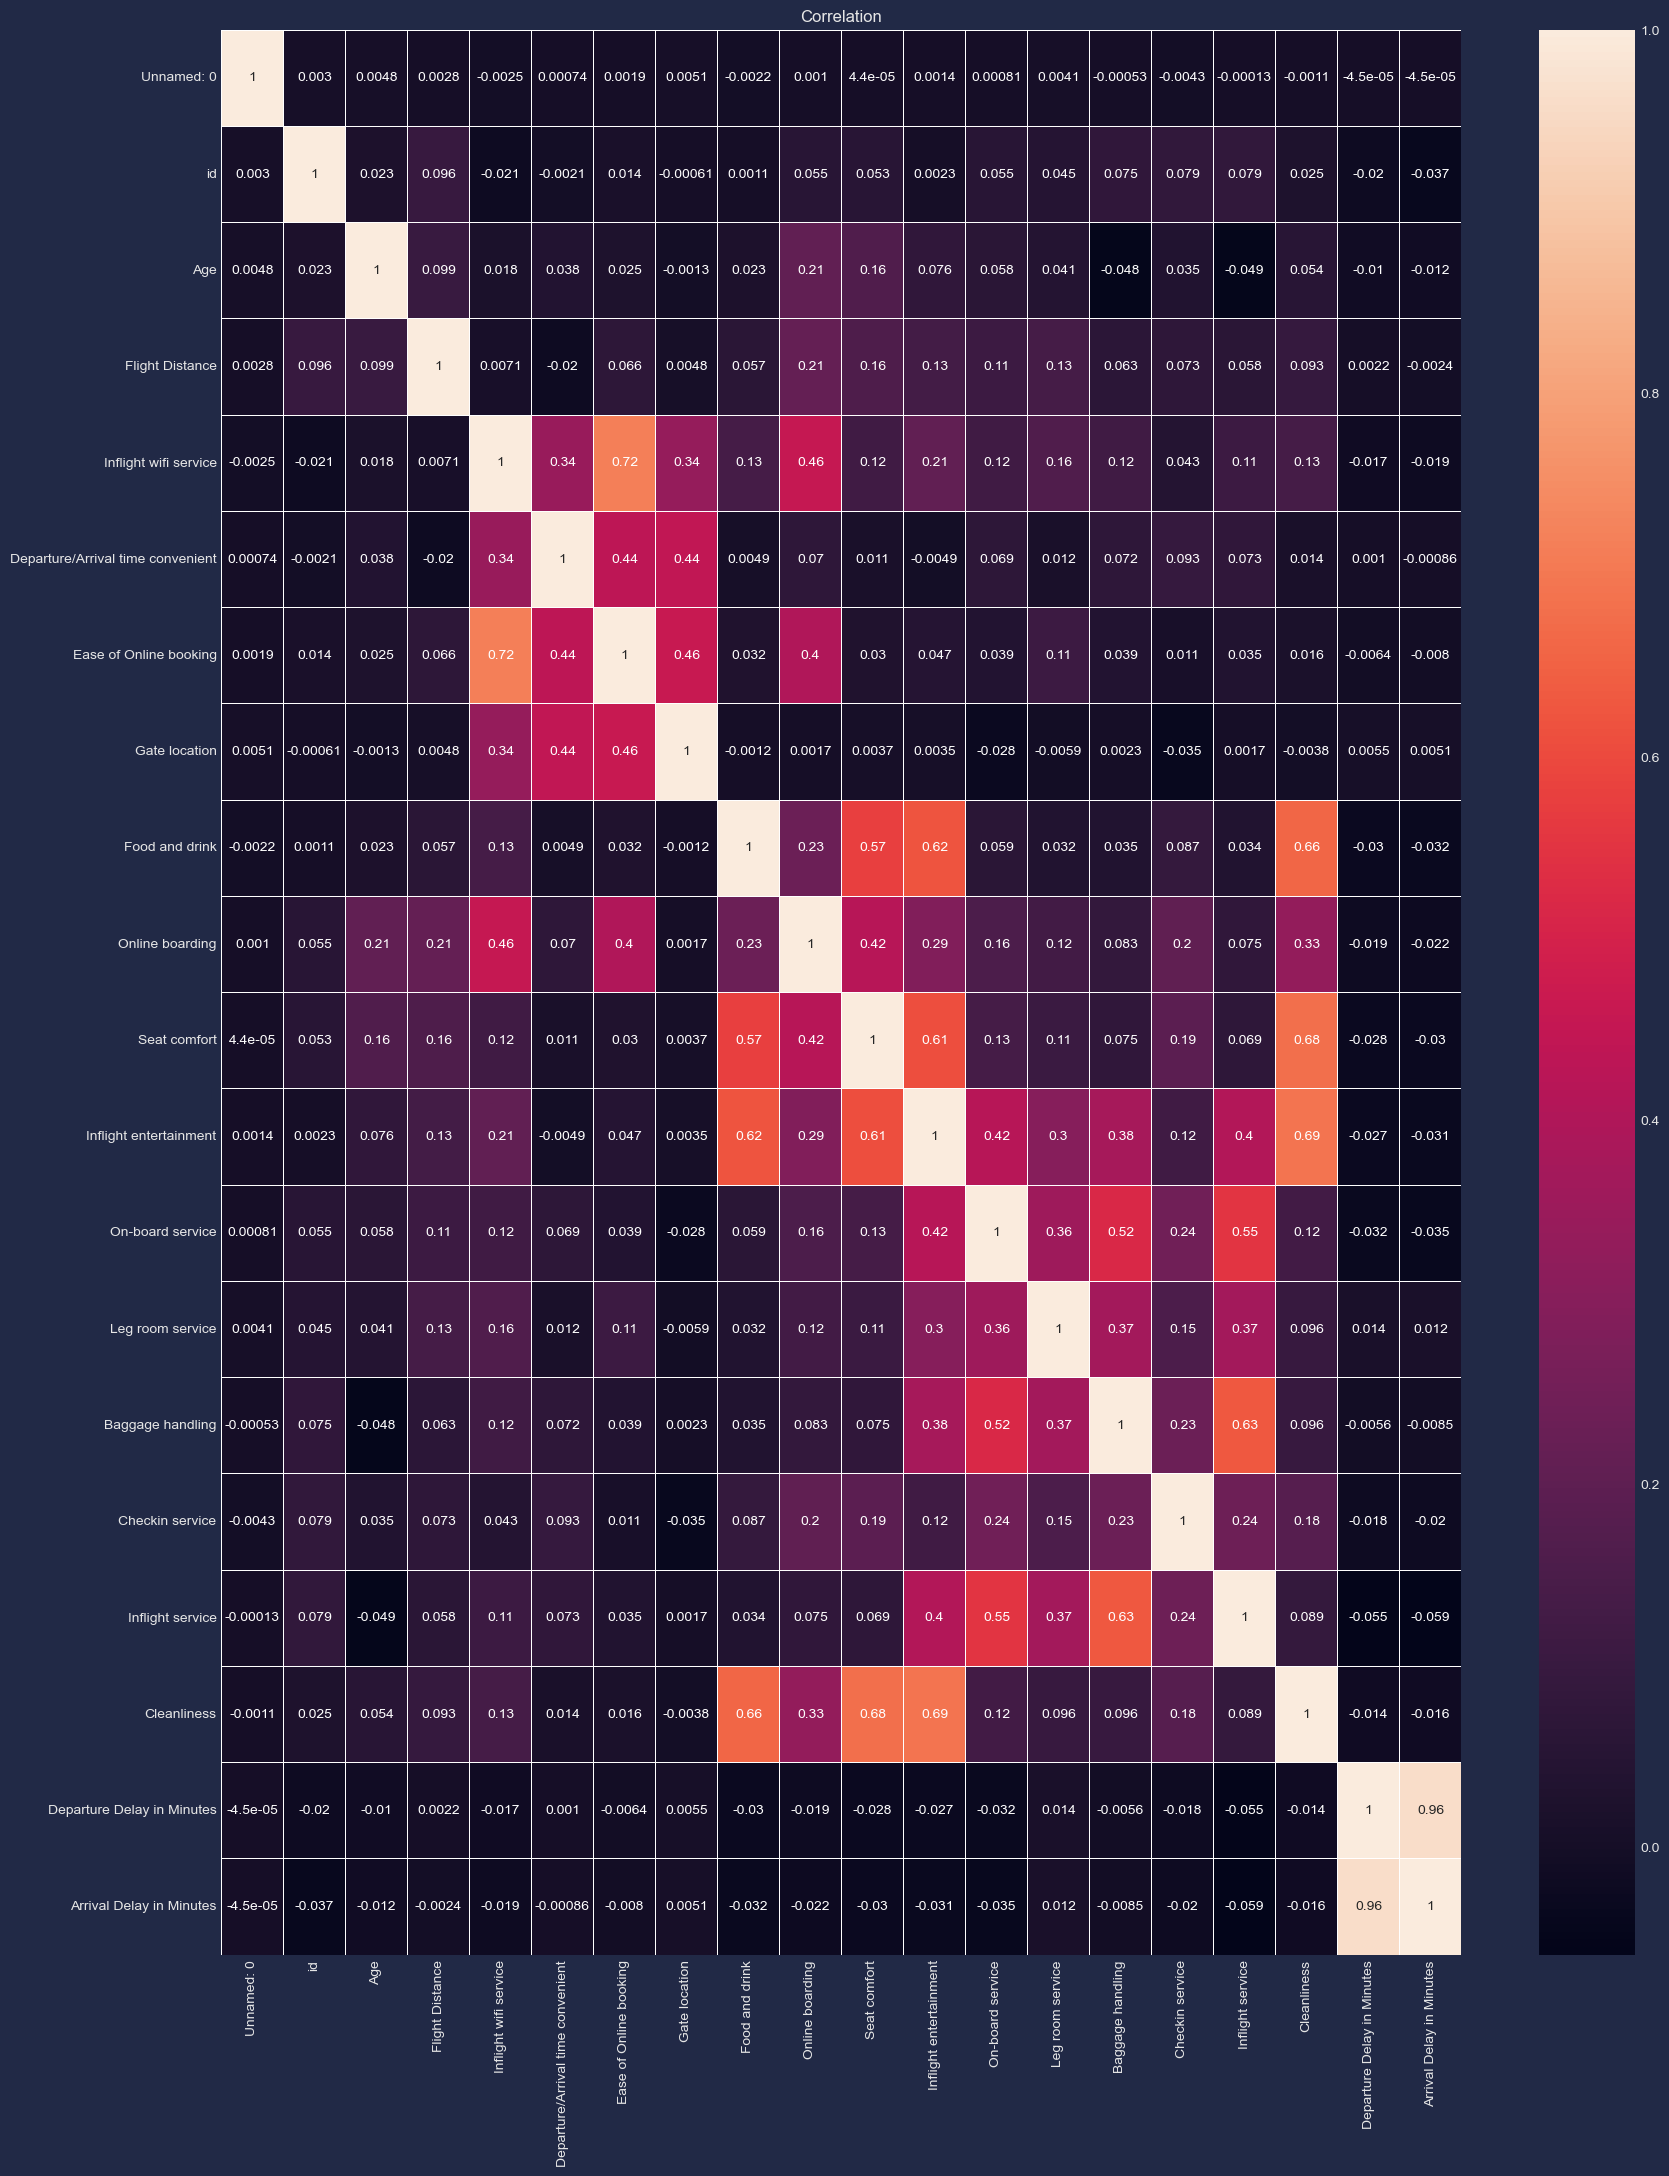

In [253]:
train_corr = train.corr()
plt.figure(figsize = (20,25))
sns.heatmap(train_corr, annot = True, linewidth = 0.5)
plt.title("Correlation")
plt.show()

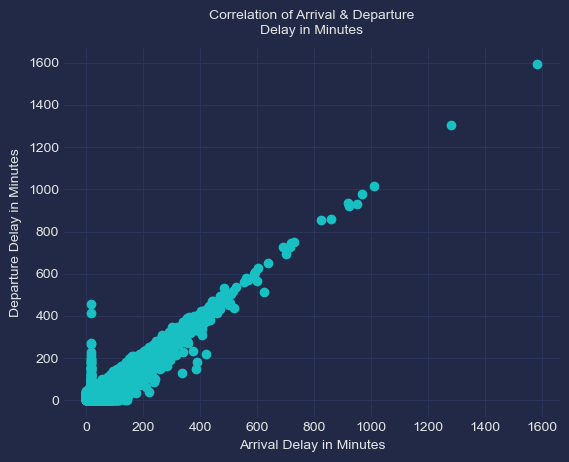

In [254]:
plt.figure()
plt.scatter(data = train,
               x = 'Arrival Delay in Minutes',
               y = 'Departure Delay in Minutes')
plt.title('Correlation of Arrival & Departure\nDelay in Minutes', fontsize = 10, pad = 10)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.show()

### Data Preprocessing

In [255]:
alldata = [train, test]

for data in alldata:
    data.drop(["Unnamed: 0", "id"], axis = 1, inplace = True)

In [256]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [257]:
test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [258]:
from sklearn.preprocessing import LabelEncoder

data_categorical = ['Gender', 'Customer Type','Type of Travel', 'Class','satisfaction']

LE = LabelEncoder()

train['Gender'] = LE.fit_transform(train['Gender'])
print("Gender")
print(LE.classes_)
print(np.sort(train['Gender'].unique()))
print('')

train['Customer Type'] = LE.fit_transform(train['Customer Type'])
print("Customer Type")
print(LE.classes_)
print(np.sort(train['Customer Type'].unique()))
print('')

train['Type of Travel'] = LE.fit_transform(train['Type of Travel'])
print("Type of Travel")
print(LE.classes_)
print(np.sort(train['Type of Travel'].unique()))
print('')

train['Class'] = LE.fit_transform(train['Class'])
print("Class")
print(LE.classes_)
print(np.sort(train['Class'].unique()))
print('')

train['satisfaction'] = LE.fit_transform(train['satisfaction'])
print("Satisfaction")
print(LE.classes_)
print(np.sort(train['satisfaction'].unique()))
print('')

Gender
['Female' 'Male']
[0 1]

Customer Type
['Loyal Customer' 'disloyal Customer']
[0 1]

Type of Travel
['Business travel' 'Personal Travel']
[0 1]

Class
['Business' 'Eco' 'Eco Plus']
[0 1 2]

Satisfaction
['neutral or dissatisfied' 'satisfied']
[0 1]



In [259]:
test['Gender'] = LE.fit_transform(test['Gender'])
print("Gender")
print(LE.classes_)
print(np.sort(test['Gender'].unique()))
print('')

test['Customer Type'] = LE.fit_transform(test['Customer Type'])
print("Customer Type")
print(LE.classes_)
print(np.sort(test['Customer Type'].unique()))
print('')

test['Type of Travel'] = LE.fit_transform(test['Type of Travel'])
print("Type of Travel")
print(LE.classes_)
print(np.sort(test['Type of Travel'].unique()))
print('')

test['Class'] = LE.fit_transform(test['Class'])
print("Class")
print(LE.classes_)
print(np.sort(test['Class'].unique()))
print('')

test['satisfaction'] = LE.fit_transform(test['satisfaction'])
print("Satisfaction")
print(LE.classes_)
print(np.sort(test['satisfaction'].unique()))
print('')

Gender
['Female' 'Male']
[0 1]

Customer Type
['Loyal Customer' 'disloyal Customer']
[0 1]

Type of Travel
['Business travel' 'Personal Travel']
[0 1]

Class
['Business' 'Eco' 'Eco Plus']
[0 1 2]

Satisfaction
['neutral or dissatisfied' 'satisfied']
[0 1]



## Untuk Label Class/Target = Satisfaction
- 0 = Neutral or dissatisfied
- 1 = Satisfied

In [260]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [261]:
# Data Splitting
x_train = train.drop(['satisfaction'], axis = 1)
y_train = train['satisfaction']

x_test = test.drop(['satisfaction'], axis = 1)
y_test = test['satisfaction']

### Model Building

In [262]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [263]:
#Define a path to the folder where you want to save the model
path = '/home/ramawan/work/'

In [264]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [265]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [266]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [267]:
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [268]:
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [270]:
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
dt2 = GridSearchCV(DT, cv_params, scoring = scoring, cv= 4, refit = 'roc_auc')

In [271]:
dt2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

In [272]:
dt2.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [273]:
dt2.best_score_

0.9843304055752842

In [274]:
dt2_cv_result = make_results('Decision Tree', dt2, 'auc')
dt2_cv_result

,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.93566,0.916446,0.925905,0.936461,0.98433


In [275]:
dt2_pred = dt2.best_estimator_.predict(x_test)
dt2_cm = confusion_matrix(y_test, dt2_pred)
print(dt2_cm)

[[13811   762]
 [  900 10503]]


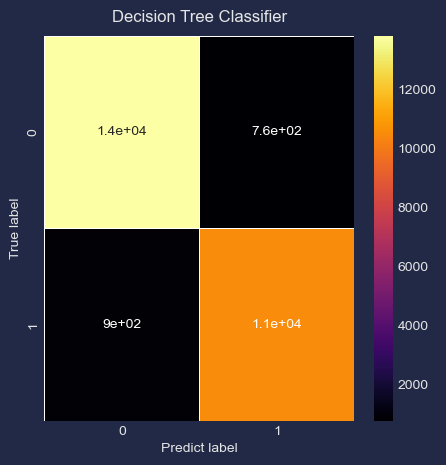

In [276]:
plt.figure(figsize = (5,5))
sns.heatmap(dt2_cm, annot=True, linewidth = 0.5, cmap = "inferno")
plt.title("Decision Tree Classifier", fontsize = 12, pad = 10)
plt.xlabel("Predict label")
plt.ylabel("True label")
plt.show()

In [277]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [278]:
print("Accuracy score training data: ", RF.score(x_train, y_train))
print("Accuracy score testing data: ", RF.score(x_test, y_test))
print('')

y_pred = RF.predict(x_test)

rf_cr = classification_report(y_test, y_pred)
print(rf_cr)

rf_auc = roc_auc_score(y_test, y_pred)
print("Auc Score :", rf_auc)

Accuracy score training data:  1.0
Accuracy score testing data:  0.9626193409300893

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Auc Score : 0.9603421389834469


[[14267   306]
 [  665 10738]]


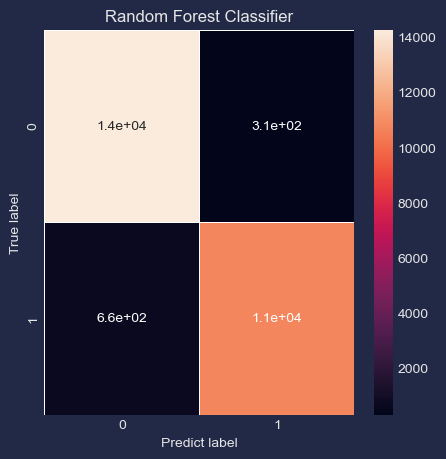

In [279]:
rf_cm = confusion_matrix(y_test, y_pred)
print(rf_cm)

plt.figure(figsize = (5,5))
sns.heatmap(rf_cm, annot = True, linewidth = 0.5)
plt.title("Random Forest Classifier")
plt.xlabel("Predict label")
plt.ylabel("True label")
plt.show()

In [280]:
xgb = XGBClassifier()
xgb_params = {'max_depth':[4, 6, 8, None],
             'learning_rate': [0.2, 0.3],
             'n_estimators': [50, 75],
              'min_child_weight' : [2,4]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
xgb = GridSearchCV(xgb, xgb_params, scoring = scoring, refit = 'roc_auc')

In [ ]:
%%time
xgb.fit(x_train, y_train)

In [ ]:
xgb.best_params_

In [ ]:
xgb.best_score_

In [ ]:
xgb_results = make_results('XGB Classifier', xgb, 'auc')
xgb_results

In [ ]:
print("Accuracy Score Data Training :", xgb.score(x_train, y_train))
print("Accuracy Score Data Testing :", xgb.score(x_test, y_test))

In [ ]:
# Plot the tree
plt.figure(figsize=(100,70))
plot_tree(dt2.best_estimator_, max_depth=8, fontsize=14, feature_names=train.columns, 
          class_names={0:'neutral or dissatisfied', 1:'satisfied'}, filled=True);
plt.title("Decision Tree Classifier", fontsize = 70)
plt.show()

In [ ]:
from xgboost import plot_tree as plot_tree_xgb

In [ ]:
dt2_importance = pd.DataFrame(dt2.best_estimator_.feature_importances_,
                              columns=['Feature_importances'],
                              index=x_train.columns)

dt2_importance = dt2_importance.sort_values(by='Feature_importances', ascending=False)
dt2_importance

In [ ]:
sns.barplot(data=dt2_importance, x="Feature_importances", y=dt2_importance.index, orient='h')
plt.title("Decision Tree: Feature Importances for Airline Passenger Satisfaction", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

dari barplot diatas menunjukkan bahwa dari hasil model Decision tree menunjukkan bahwa, "online boarding", "inflight wifi service", "type of travel" memiliki kepentingan paling tinggi dalam urutan tersebut.

In [ ]:
rf_importance = pd.DataFrame(RF.feature_importances_,
                              columns=['Feature_importances'],
                              index=x_train.columns)

rf_importance = rf_importance.sort_values(by='Feature_importances', ascending=False)
rf_importance

In [ ]:
sns.barplot(data=rf_importance, x="Feature_importances", y=rf_importance.index, orient='h')
plt.title("Random Forest: Feature Importances for Airline Passenger Satisfaction", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

dari barplot diatas menunjukkan bahwa dari hasil model Random forest menunjukkan bahwa, "online boarding", "inflight wifi service", "Class" memiliki kepentingan paling tinggi dalam urutan tersebut. namun pada model Random Forest nilai yang dihasilkan tidak sebesar model decision tree dan xgboost, ini dikarenakan pada model Random Forest saya tidak menggunakan GridSearchCV. alasan tidak menggunakan GridSearchCV karena terlalu lama saat pemrosesan, dikarenakan komputasi saya kurang memadai.

In [ ]:
xgb_importance = pd.DataFrame(xgb.best_estimator_.feature_importances_,
                              columns=['Feature_importances'],
                              index=x_train.columns)

xgb_importance = xgb_importance.sort_values(by='Feature_importances', ascending=False)
xgb_importance

In [ ]:
sns.barplot(data=xgb_importance, x="Feature_importances", y=xgb_importance.index, orient='h')
plt.title("XGBoost: Feature Importances for Airline Passenger Satisfaction", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

dari barplot diatas menunjukkan bahwa dari hasil model XGBoost menunjukkan bahwa, "online boarding", "type of travel", "Inflight wifi service" memiliki kepentingan paling tinggi dalam urutan tersebut.

### Kesimpulan dan Rekomendasi

Dari hasil ketiga model diatas menunjukkan bahwa variable paling penting yang mempengaruhi kepuasan pelanggan adalah "online boarding", "type of travel", "Inflight wifi service".

untuk dapat mempertahankan pelanggan, beberapa rekomendasi dapat disampaikan kepada stakeholders:
- Perbaiki sistem "Online Boarding" dari segi database, server, pengalaman pengguna baik website ataupun aplikasi mobile. perbaiki tampilannya juga bila diperlukan.
- Menyelidiki apakah adanya bug didalam website, server, database, aplikasi sehingga membuat pelanggan merasa tidak nyaman ketika melakukan online boarding.
- Perbaiki layanan wifi saya pesawat berada diatas, karena layanan wifi dapat membuat pelanggan merasa nyaman, tidak bosan saat perjalanan panjang. ini akan membuat pelanggan juga merasa senang ketika perjalanan panjang.
- untuk type of travel, kalau melihat dari insight/informasi grafik diatas (EDA) menunjukkan bahwa pada Personal Travel memiliki ketidakpuasan yang sangat tinggi. mungkin bisa diperbaiki dari segi pelayanan yang diberikan kepada Personal Travel. seperti, ruang tunggu, pelayanan crew, pelayanan checkin pada personal travel.